In [1]:
from DogVsWolves.config.configuration import ConfigurationManager
from DogVsWolves.components.model_manager import *

In [2]:
os.getcwd()

'/home/mirza/Dogs_vs_Wolves/notebooks'

In [3]:
os.chdir("..")

## Prepare data, initialize model and fit model

In [4]:

# Project configuration: data directory, model parameters, ...
config = ConfigurationManager()
train_validation_test_config = config.get_train_validation_test_config()

# Prepare data
prepare_data = PrepareData(train_validation_test_config)
train_loader, validation_loader, test_loader = prepare_data.split()

# Initialize model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ConvolutionalNeuralNetwork()
model = model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                            lr=train_validation_test_config.params_learning_rate)

[2024-07-21 19:28:20,535: INFO: common: yaml file: config/config.yaml loaded successfully]
[2024-07-21 19:28:20,538: INFO: common: yaml file: params.yaml loaded successfully]
[2024-07-21 19:28:20,539: INFO: common: created directory at: artifacts]
[2024-07-21 19:28:20,540: INFO: common: created directory at: artifacts/trained_model]


In [5]:
# Train model
model.fit(train_validation_test_config.params_epochs,
          train_validation_test_config.params_tolerance,
          train_validation_test_config.params_min_delta,
          train_loader, 
          validation_loader, 
          device, 
          loss_function, 
          optimizer)

       | 9/200 [00:58<20:33,  6.46s/it]Epoch: 10 | Train loss: 0.6984 | Train accuracy: 0.5454 | Validation loss: 0.6811 | Validation accuracy: 0.5759
       | 19/200 [02:02<19:21,  6.42s/it]Epoch: 20 | Train loss: 0.6796 | Train accuracy: 0.5655 | Validation loss: 0.6672 | Validation accuracy: 0.6049
       | 29/200 [03:06<18:17,  6.42s/it]Epoch: 30 | Train loss: 0.6790 | Train accuracy: 0.5883 | Validation loss: 0.6581 | Validation accuracy: 0.5982
       | 39/200 [04:09<17:03,  6.36s/it]Epoch: 40 | Train loss: 0.6649 | Train accuracy: 0.6033 | Validation loss: 0.6750 | Validation accuracy: 0.5893
       | 49/200 [05:14<16:06,  6.40s/it]Epoch: 50 | Train loss: 0.6582 | Train accuracy: 0.6082 | Validation loss: 0.6369 | Validation accuracy: 0.6451
       | 59/200 [06:18<15:06,  6.43s/it]Epoch: 60 | Train loss: 0.6620 | Train accuracy: 0.6130 | Validation loss: 0.6391 | Validation accuracy: 0.6786
▍      | 69/200 [07:21<13:44,  6.29s/it]Epoch: 70 | Train loss: 0.6522 | Train accuracy: 

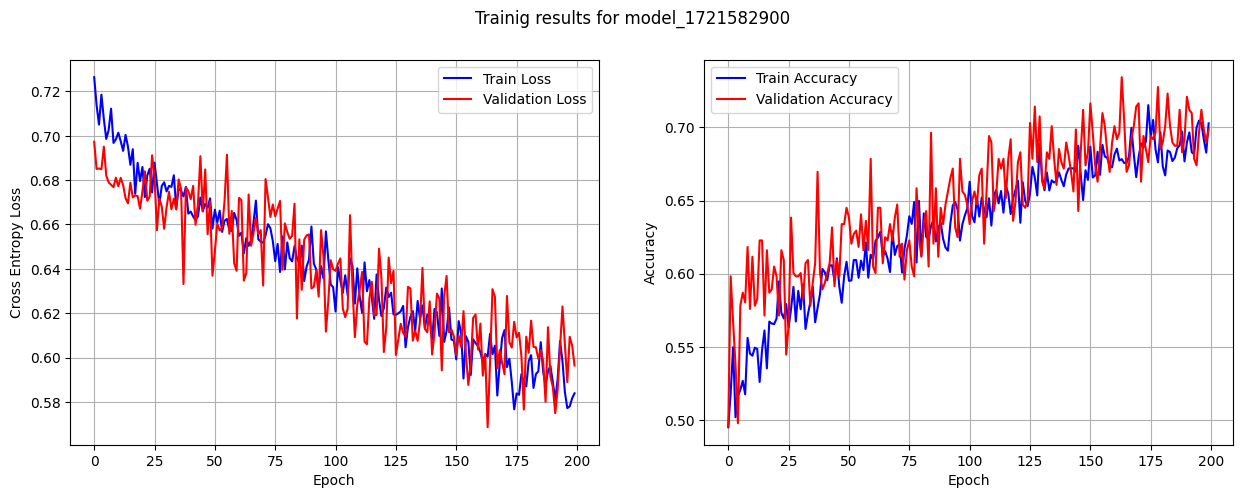

In [6]:
model.plot_results(None)

In [7]:
test_loss, test_acc, y_pred, y_true  = model.evaluate_model(test_loader, device, loss_function)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f} ")

Test loss: 0.5677 | Test accuracy: 0.6950 


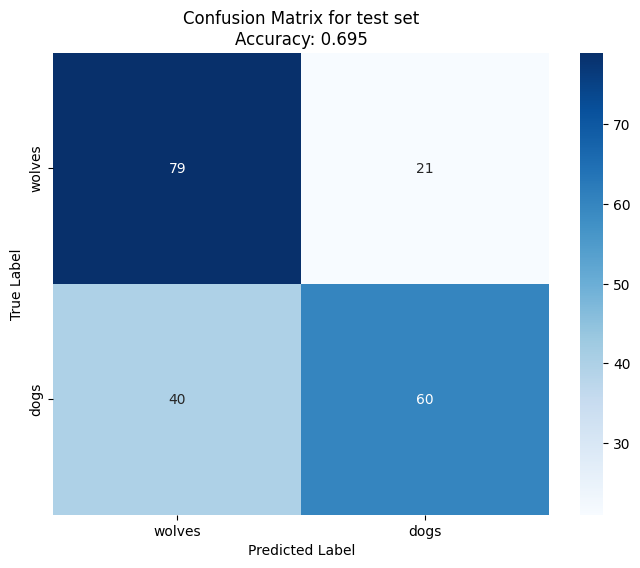

In [8]:
plot_confusion_matrix(y_true, y_pred, prepare_data.data.image_labels_mapping)

In [9]:
torch.save(model.state_dict(), train_validation_test_config.trained_model_inference_path)